<a href="https://colab.research.google.com/github/Nishith-Ravuri/ml/blob/main/deep-learning/pytorch-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand-written digits recognization

This jupyter notebook implements a Neural Network using Pytorch to recognize hand written digits.



### Install Python Libraries

In [5]:
!pip install -q numpy pandas torch torchvision matplotlib

### Import libraries

In [52]:
import torch
import torchvision
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F

In [68]:
transform = T.Compose([
    T.ToTensor()
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=1)

classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

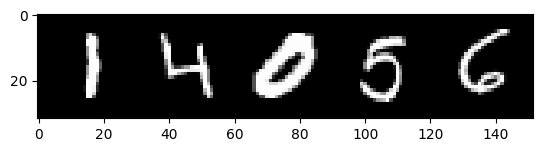

1 4 0 5 6


In [40]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  plt.imshow(img.permute(1, 2, 0))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [64]:
class NeuralNetworkMNIST(nn.Module):

  def __init__(self):
    super(NeuralNetworkMNIST, self).__init__()

    self.layer_1 = nn.Linear(784, 1024, bias=True)
    self.layer_2 = nn.Linear(1024, 1024)
    self.output_layer = nn.Linear(1024,10)

  def forward(self, x):
    x = F.relu(self.layer_1(x))
    x = F.relu(self.layer_2(x))
    output = self.output_layer(x)

    return output

In [65]:
model = NeuralNetworkMNIST()
print(model.parameters)

<bound method Module.parameters of NeuralNetworkMNIST(
  (layer_1): Linear(in_features=784, out_features=1024, bias=True)
  (layer_2): Linear(in_features=1024, out_features=1024, bias=True)
  (output_layer): Linear(in_features=1024, out_features=10, bias=True)
)>


In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
num_epochs = 1

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images = images.reshape(-1, 28*28)

    output = model(images)

    # Calcualte loss
    loss = loss_fn(output, labels)

    # Calculate gradient
    optimizer.zero_grad() # it will not accumulate gradients
    loss.backward()       # Backward propagation
    optimizer.step()      # Update parameters

    if (i+1) % 100 == 0:
      print(f"epoch={epoch+1}/{num_epochs} step={i+1}/{len(trainloader)}, loss={loss.item()}")

epoch=1/1 step=100/938, loss=0.46211981773376465
epoch=1/1 step=200/938, loss=0.16759881377220154
epoch=1/1 step=300/938, loss=0.23736174404621124
epoch=1/1 step=400/938, loss=0.1557384878396988
epoch=1/1 step=500/938, loss=0.13329365849494934
epoch=1/1 step=600/938, loss=0.20785202085971832
epoch=1/1 step=700/938, loss=0.14101111888885498
epoch=1/1 step=800/938, loss=0.08703545480966568
epoch=1/1 step=900/938, loss=0.04832339659333229


In [74]:
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)
test_images = test_images.reshape(-1, 28*28)
test_labels

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


tensor([4, 4, 6, 0, 2, 3, 0, 4, 6, 2, 3, 4, 3, 0, 6, 1, 8, 6, 8, 5, 4, 1, 9, 2,
        0, 2, 1, 9, 6, 8, 5, 4, 1, 9, 6, 7, 4, 8, 9, 3, 8, 6, 2, 6, 2, 6, 3, 6,
        2, 5, 3, 1, 7, 3, 9, 2, 7, 0, 5, 3, 1, 7, 4, 1])

In [100]:
softmax = nn.Softmax(dim=1)
torch.set_printoptions(precision=4)
with torch.no_grad():
  predictions = model(test_images)
  probs = softmax(predictions)
  print(f"{probs}")

tensor([[7.6417e-07, 8.1019e-06, 9.7482e-06, 3.4976e-06, 9.9521e-01, 1.1042e-05,
         1.2349e-07, 4.6088e-04, 1.6313e-06, 4.2952e-03],
        [5.1018e-05, 4.3079e-02, 9.4455e-03, 2.6552e-04, 8.9293e-01, 7.2843e-05,
         1.8573e-03, 5.2234e-02, 8.6526e-06, 5.1519e-05],
        [4.0315e-06, 8.4367e-05, 2.1422e-05, 5.6325e-06, 6.3717e-05, 3.2044e-03,
         9.9662e-01, 1.1642e-07, 9.1994e-07, 2.0589e-08],
        [9.9973e-01, 1.7542e-07, 2.5060e-05, 4.0449e-06, 2.9773e-07, 2.1709e-04,
         3.5657e-06, 7.7041e-07, 4.1770e-06, 1.7935e-05],
        [1.9965e-08, 8.9055e-05, 9.9953e-01, 3.1275e-04, 4.8341e-09, 1.1147e-08,
         4.4554e-09, 5.4373e-05, 1.7326e-05, 2.4995e-09],
        [3.9542e-07, 3.5228e-06, 2.4276e-06, 9.9982e-01, 3.7883e-08, 1.0865e-04,
         8.9983e-10, 1.8980e-05, 4.1527e-06, 3.7731e-05],
        [1.0000e+00, 5.4880e-12, 6.9127e-08, 2.9965e-11, 2.3284e-10, 5.1524e-11,
         1.0487e-09, 2.4076e-10, 2.1718e-09, 5.9326e-08],
        [1.4273e-10, 3.6397